<h1>Patient Survival Prediction</h1>
<hr>
<h2>Project 4</h2>
<p>This project predicts the survival of pacients in a UCI.</p>
<hr>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from autoviz import data_cleaning_suggestions

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from utilerias import missing_values_table


%matplotlib inline

In [33]:
df_patients = pd.read_csv('../datasets/dataset_eda.csv')

<hr>
<h2>Preprocessing</h2>
<hr>
<p>Missing Values Treatment</p>

In [4]:
df_patients.head()

,Unnamed: 0,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [34]:
df_patients.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
missing_values_table(df_patients).style.background_gradient(cmap='Blues')

Sumary :
Columns     :186
Null values :175


,Missing Values,% of Total Values
h1_bilirubin_max,84619,92.300000
h1_bilirubin_min,84619,92.300000
h1_lactate_min,84369,92.000000
h1_lactate_max,84369,92.000000
h1_albumin_max,83824,91.400000
h1_albumin_min,83824,91.400000
h1_pao2fio2ratio_min,80195,87.400000
h1_pao2fio2ratio_max,80195,87.400000
h1_arterial_ph_min,76424,83.300000
h1_arterial_ph_max,76424,83.300000


<AxesSubplot:>

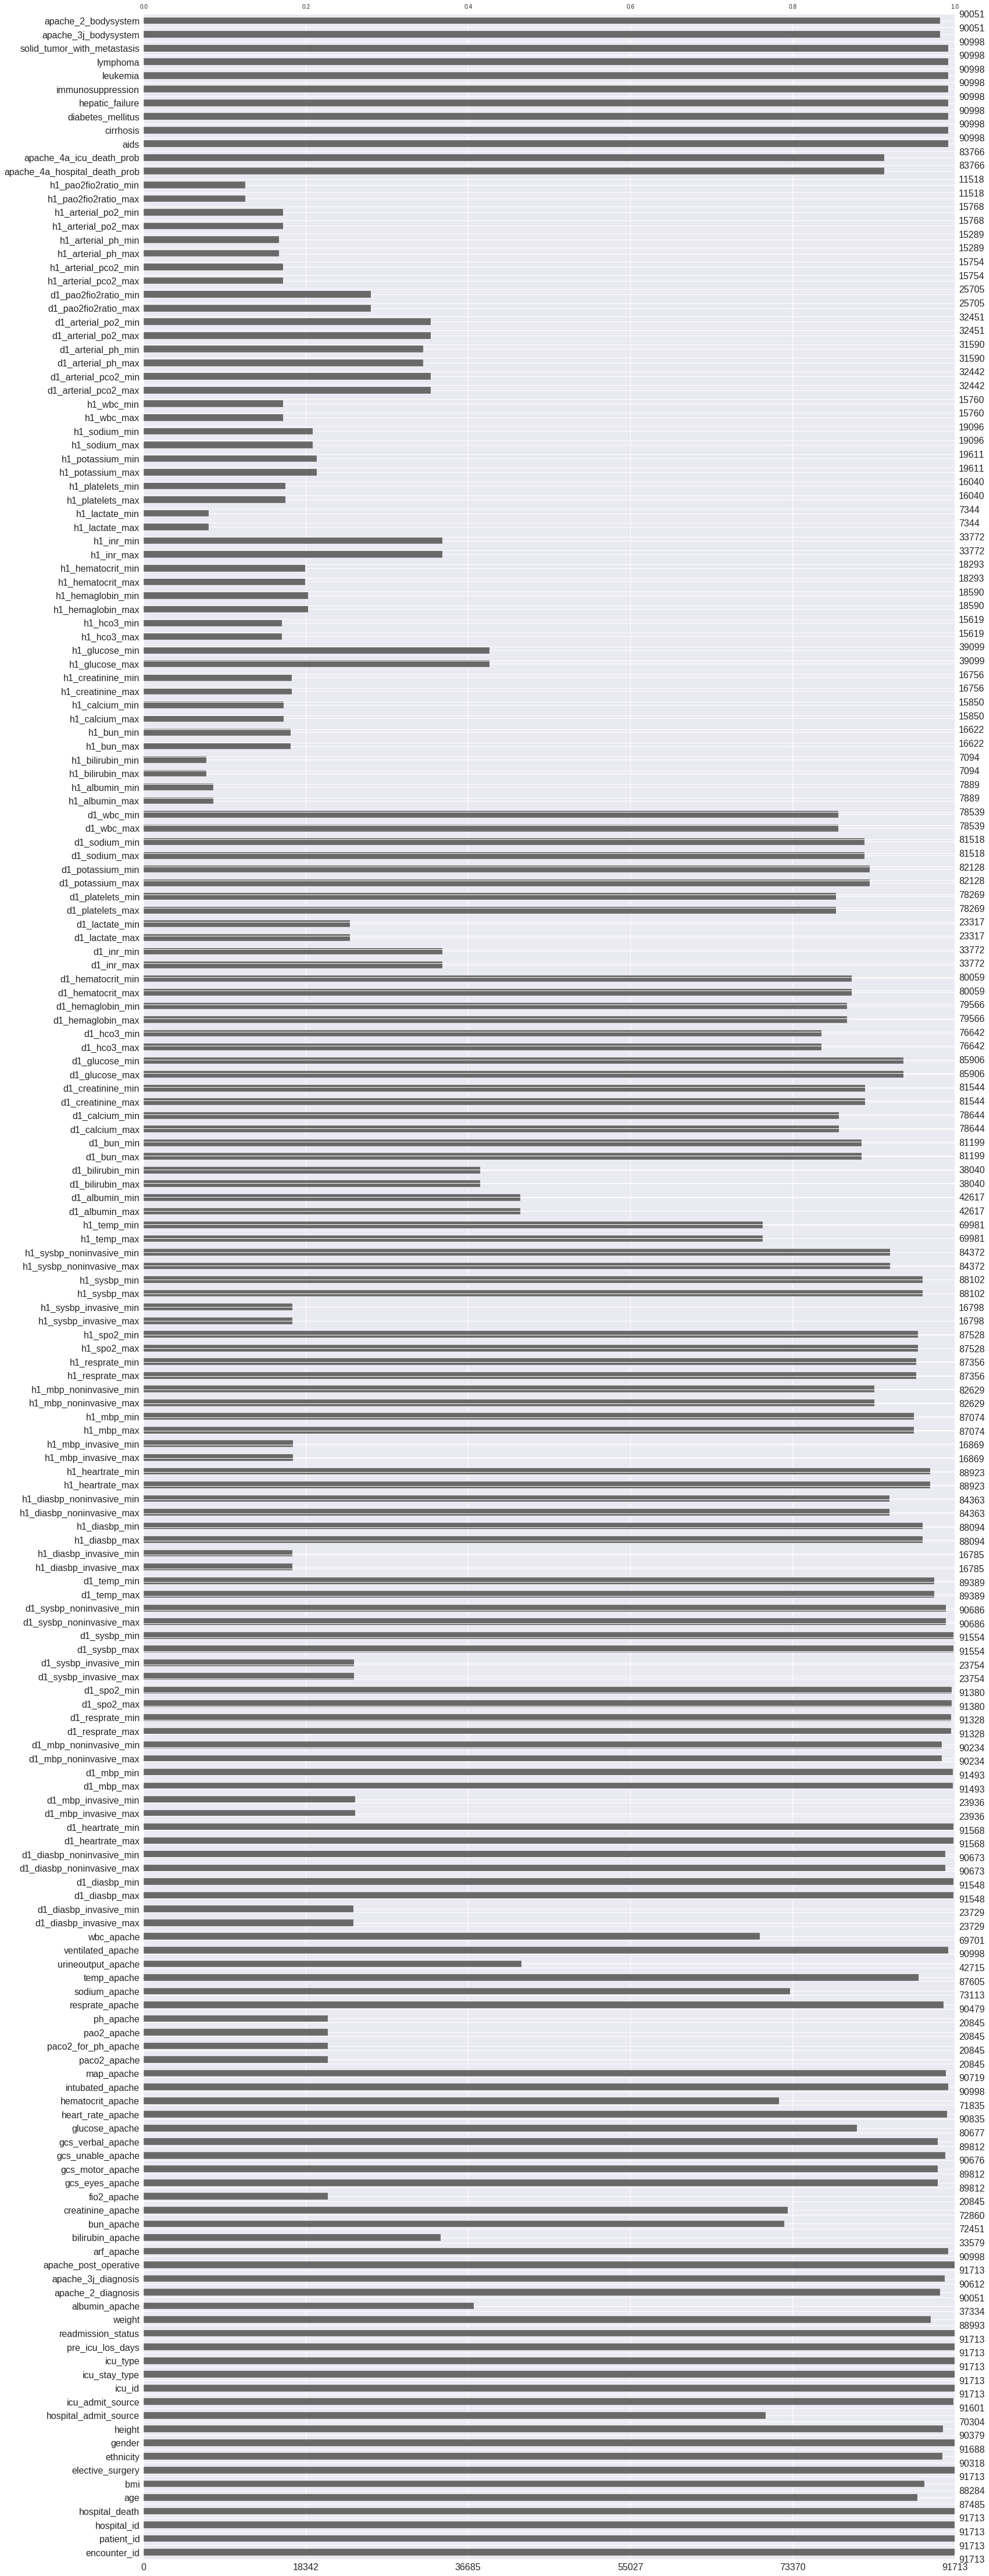

In [35]:
msno.bar(df_patients)

In [15]:
print('Features and its values')
print('=======================')
for feature in df_patients:
    print(f'{feature} ==> {df_patients[feature].value_counts()}')

Features and its values
encounter_id ==> 66154     1
76188     1
37789     1
108084    1
33405     1
         ..
65127     1
33600     1
130065    1
81357     1
1671      1
Name: encounter_id, Length: 91713, dtype: int64
patient_id ==> 25312    1
14664    1
60980    1
47973    1
32805    1
        ..
48476    1
90988    1
15402    1
75350    1
53612    1
Name: patient_id, Length: 91713, dtype: int64
hospital_id ==> 118    4333
19     3925
188    3095
161    2792
70     2754
       ... 
23        7
4         7
93        6
95        6
130       2
Name: hospital_id, Length: 147, dtype: int64
hospital_death ==> 0    83798
1     7915
Name: hospital_death, dtype: int64
age ==> 67.0    2271
68.0    2173
71.0    2141
72.0    2110
66.0    2059
        ... 
19.0     343
20.0     338
18.0     259
17.0     126
16.0      44
Name: age, Length: 74, dtype: int64
bmi ==> 14.844926    443
67.814990    422
24.017768     87
24.208110     86
27.359332     82
            ... 
61.796764      1
23.241435     

In [16]:
#lets delete some features
#1) those that seems not related
lstFeaturesToDrop1 = ['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status']
#2) those with 50% of missing values or more.
lstFeaturesToDrop2 = ['h1_bilirubin_max'
,'h1_bilirubin_min'
,'h1_lactate_min'
,'h1_lactate_max'
,'h1_albumin_max'
,'h1_albumin_min'
,'h1_pao2fio2ratio_min'
,'h1_pao2fio2ratio_max'
,'h1_arterial_ph_min'
,'h1_arterial_ph_max'
,'h1_hco3_min'
,'h1_hco3_max'
,'h1_arterial_pco2_min'
,'h1_arterial_pco2_max'
,'h1_wbc_max'
,'h1_wbc_min'
,'h1_arterial_po2_max'
,'h1_arterial_po2_min'
,'h1_calcium_min'
,'h1_calcium_max'
,'h1_platelets_max'
,'h1_platelets_min'
,'h1_bun_min'
,'h1_bun_max'
,'h1_creatinine_min'
,'h1_creatinine_max'
,'h1_diasbp_invasive_max'
,'h1_diasbp_invasive_min'
,'h1_sysbp_invasive_max'
,'h1_sysbp_invasive_min'
,'h1_mbp_invasive_min'
,'h1_mbp_invasive_max'
,'h1_hematocrit_min'
,'h1_hematocrit_max'
,'h1_hemaglobin_max'
,'h1_hemaglobin_min'
,'h1_sodium_max'
,'h1_sodium_min'
,'h1_potassium_min'
,'h1_potassium_max'
,'ph_apache'
,'pao2_apache'
,'paco2_for_ph_apache'
,'paco2_apache'
,'fio2_apache'
,'d1_lactate_max'
,'d1_lactate_min'
,'d1_diasbp_invasive_min'
,'d1_diasbp_invasive_max'
,'d1_sysbp_invasive_max'
,'d1_sysbp_invasive_min'
,'d1_mbp_invasive_min'
,'d1_mbp_invasive_max'
,'d1_pao2fio2ratio_min'
,'d1_pao2fio2ratio_max'
,'d1_arterial_ph_min'
,'d1_arterial_ph_max'
,'d1_arterial_pco2_max'
,'d1_arterial_pco2_min'
,'d1_arterial_po2_min'
,'d1_arterial_po2_max'
,'bilirubin_apache'
,'h1_inr_max'
,'d1_inr_min'
,'h1_inr_min'
,'d1_inr_max'
,'albumin_apache'
,'d1_bilirubin_min'
,'d1_bilirubin_max'
,'h1_glucose_min'
,'h1_glucose_max'
,'d1_albumin_min'
,'d1_albumin_max'
,'urineoutput_apache']

In [17]:
df_patients.drop(lstFeaturesToDrop1+lstFeaturesToDrop2, axis=1, inplace=True)

In [37]:
#shape of resultant
df_patients.shape

(91713, 186)

In [38]:
#let's check out for duplicate values out
df_patients.duplicated().sum()

0

In [50]:
null_cols = df_patients.isnull().sum(axis=1).sort_values(ascending=False)

null_cols[null_cols>=80]

3011     169
33104    168
90275    160
13063    158
35421    158
        ... 
71961     80
75706     80
58095     80
7092      80
75254     80
Length: 14820, dtype: int64

In [51]:
#lets delete those 295 registers with more than 50 null features
df_patients[df_patients.index.isin(null_cols[null_cols>=80].index)]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
12,76356,41311,118,0,48.0,NaN,0,Caucasian,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
18,48056,114220,118,0,65.0,28.408929,0,Hispanic,M,167.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
20,79115,88295,83,0,79.0,28.376100,1,Caucasian,F,170.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91700,103983,25454,30,0,85.0,25.091529,0,Caucasian,M,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
91704,96325,77671,30,0,38.0,32.992923,0,Caucasian,M,177.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91705,111411,7848,195,0,67.0,28.876843,0,African American,M,182.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91707,276,34638,183,0,NaN,33.933518,0,Caucasian,F,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_patients.drop(null_cols[null_cols>=80].index,axis=0,inplace=True)

In [53]:
df_patients

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,127138,59223,121,0,54.0,19.770448,0,Native American,M,177.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic


<AxesSubplot:>

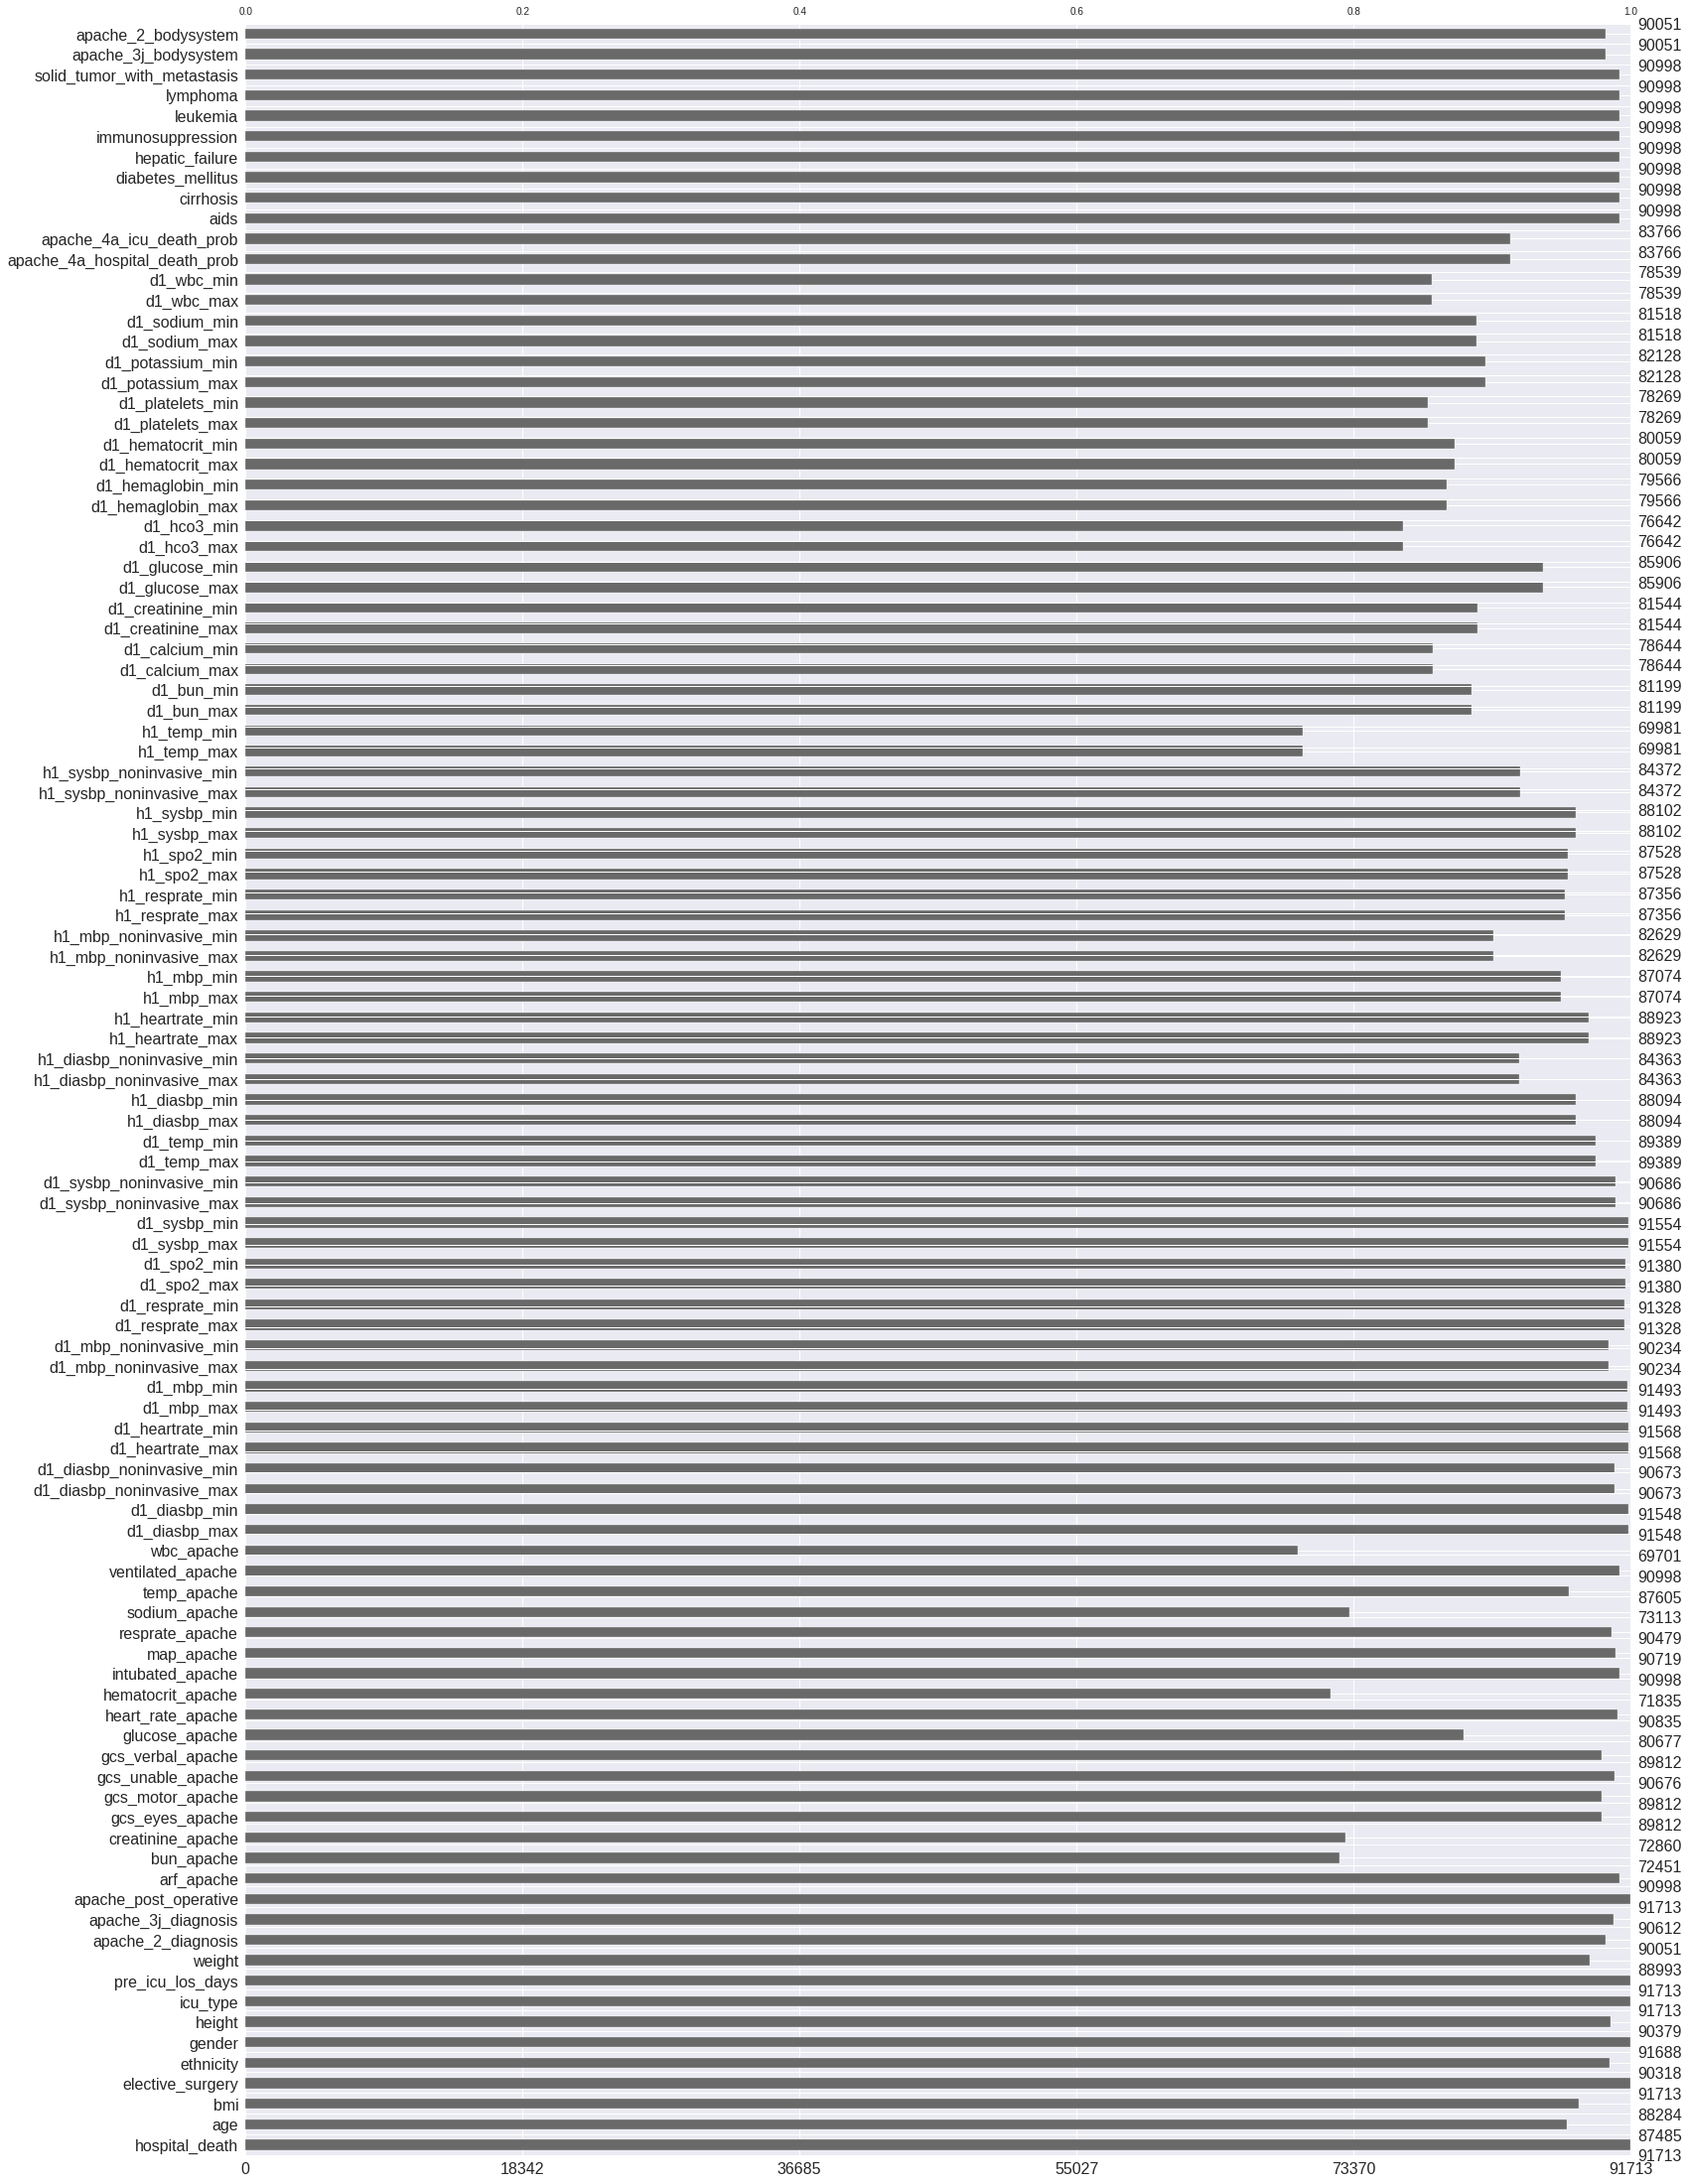

In [56]:
#let's see how much missing values has the resultant dataframe
msno.bar(df_patients)

In [19]:
print('Features and its values')
print('=======================')
for feature in df_patients:
    print(f'{feature} ==> {df_patients[feature].value_counts()}')

Features and its values
hospital_death ==> 0    83798
1     7915
Name: hospital_death, dtype: int64
age ==> 67.0    2271
68.0    2173
71.0    2141
72.0    2110
66.0    2059
        ... 
19.0     343
20.0     338
18.0     259
17.0     126
16.0      44
Name: age, Length: 74, dtype: int64
bmi ==> 14.844926    443
67.814990    422
24.017768     87
24.208110     86
27.359332     82
            ... 
61.796764      1
23.241435      1
26.130528      1
24.463976      1
47.179671      1
Name: bmi, Length: 34888, dtype: int64
elective_surgery ==> 0    74862
1    16851
Name: elective_surgery, dtype: int64
ethnicity ==> Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64
gender ==> M    49469
F    42219
Name: gender, dtype: int64
height ==> 167.6    5362
177.8    5289
160.0    5238
172.7    4834
165.1    4772
         ... 
173.6       1
176.9       1
169.3       1
18

In [ ]:
#so far I think I am able to impute null values using KNN